# Recurrent Neural Network 

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, BatchNormalization, LayerNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


def generate_time_series_data(timesteps=200, n_steps=50):
    np.random.seed(42)
    time = np.linspace(0, 4 * np.pi, timesteps)
    series = np.sin(time) + 0.5 * np.random.normal(size=timesteps)
    X, y = [], []
    for i in range(len(series) - n_steps):
        X.append(series[i:i+n_steps])
        y.append(series[i+n_steps])
    return np.array(X), np.array(y), series



In [32]:
n_steps = 50
X, y, series = generate_time_series_data(n_steps=n_steps)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))

X = X.reshape((X.shape[0], X.shape[1], 1)) 

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [33]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    metrics = {
        "Train MAE": mean_absolute_error(y_train, y_pred_train),
        "Train MSE": mean_squared_error(y_train, y_pred_train),
        "Test MAE": mean_absolute_error(y_test, y_pred_test),
        "Test MSE": mean_squared_error(y_test, y_pred_test),
    }
    return metrics


In [34]:
# Plot predictions
def plot_predictions(y_test, y_pred, title="Prediction vs Actual"):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

In [35]:
def build_RNN(n_steps):
     model = Sequential([
          SimpleRNN(50, activation = 'tanh', input_shape=(n_steps, 1)),
          Dense(1)
     ])
     model.compile(optimizer=Adam(learning_rate = 0.001), loss = "mse")
     return model

def build_deep_RNN(n_steps, batch_norm = False, layer_norm = False):
     model = Sequential()
     model.add(SimpleRNN(50, activation = 'tanh', return_sequences = True, input_shape=(n_steps, 1)))
     if batch_norm:     
          model.add(BatchNormalization())
     if layer_norm:
          model.add(LayerNormalization())
     model.add(SimpleRNN(50, activation = 'tanh'))
     model.add(Dense(1))
     model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
     return model
     

In [36]:
rnn_model = build_RNN(n_steps)
rnn_model.fit(X_train, y_train, epochs=10, batch_size = 32)
metrics_rnn = evaluate_model(rnn_model, X_train, y_train, X_test, y_test)

Epoch 1/10
4/4 [==============================] - 1s 7ms/step - loss: 0.6829
Epoch 2/10
4/4 [==============================] - 0s 8ms/step - loss: 0.0717
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0794
Epoch 4/10
4/4 [==============================] - 0s 25ms/step - loss: 0.0505
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0374
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0368
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 0.0201
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0249
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0216
Epoch 10/10
1/1 [==============================] - 0s 26ms/step


In [45]:
deep_rnn_model_without = build_deep_RNN(n_steps)
deep_rnn_model_without.fit(X_train, y_train, epochs = 10, batch_size= 32)
metrics_deep_rnn_wiuthout = evaluate_model(deep_rnn_model_without, X_train, y_train, X_test, y_test)

Epoch 1/10
4/4 [==============================] - 2s 12ms/step - loss: 0.1414
Epoch 2/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0579
Epoch 3/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0388
Epoch 4/10
4/4 [==============================] - 0s 21ms/step - loss: 0.0203
Epoch 5/10
4/4 [==============================] - 0s 17ms/step - loss: 0.0216
Epoch 6/10
4/4 [==============================] - 0s 16ms/step - loss: 0.0268
Epoch 7/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0190
Epoch 8/10
4/4 [==============================] - 0s 15ms/step - loss: 0.0150
Epoch 9/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0180
Epoch 10/10
1/1 [==============================] - 0s 40ms/step


In [37]:
deep_rnn_model = build_deep_RNN(n_steps, batch_norm=True)
deep_rnn_model.fit(X_train, y_train, epochs = 10, batch_size= 32)
metrics_deep_rnn = evaluate_model(deep_rnn_model, X_train, y_train, X_test, y_test)

Epoch 1/10
4/4 [==============================] - 2s 13ms/step - loss: 0.2388
Epoch 2/10
4/4 [==============================] - 0s 13ms/step - loss: 0.1081
Epoch 3/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0555
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0419
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0292
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0232
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0195
Epoch 8/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0151
Epoch 9/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0125
Epoch 10/10
1/1 [==============================] - 0s 22ms/step


In [38]:
deep_rnn_model_layer = build_deep_RNN(n_steps, layer_norm=True)
deep_rnn_model_layer.fit(X_train, y_train, epochs = 10, batch_size= 32)
metrics_deep_rnn_layer = evaluate_model(deep_rnn_model_layer, X_train, y_train, X_test, y_test)

Epoch 1/10
4/4 [==============================] - 2s 14ms/step - loss: 0.3023
Epoch 2/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0760
Epoch 3/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0508
Epoch 4/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0564
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0283
Epoch 6/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0293
Epoch 7/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0280
Epoch 8/10
4/4 [==============================] - 0s 15ms/step - loss: 0.0242
Epoch 9/10
4/4 [==============================] - 0s 12ms/step - loss: 0.0192
Epoch 10/10
1/1 [==============================] - 0s 23ms/step


In [39]:
def build_lstm(n_steps):
    model = Sequential([
        LSTM(50, activation='tanh', input_shape=(n_steps, 1)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

def build_gru(n_steps):
    model = Sequential([
        GRU(50, activation='tanh', input_shape=(n_steps, 1)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

In [40]:
lstm_model = build_lstm(n_steps)
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
metrics_lstm = evaluate_model(lstm_model, X_train, y_train, X_test, y_test)



1/1 [==============================] - 0s 23ms/step


In [41]:
gru_model = build_gru(n_steps)
gru_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
metrics_gru = evaluate_model(gru_model, X_train, y_train, X_test, y_test)

1/1 [==============================] - 0s 21ms/step


In [47]:
print("RNN Metrics:", metrics_rnn)
print("Deep RNN  Metrics:", metrics_deep_rnn_wiuthout)
print("Deep RNN batch Metrics:", metrics_deep_rnn)
print("LSTM Metrics:", metrics_lstm)
print("GRU Metrics:", metrics_gru)
print("Deep RNN layer Metrics:", metrics_deep_rnn_layer)


RNN Metrics: {'Train MAE': 0.10993952834402347, 'Train MSE': 0.019594754563765485, 'Test MAE': 0.11954358860758378, 'Test MSE': 0.021371464195411517}
Deep RNN  Metrics: {'Train MAE': 0.09179691981634412, 'Train MSE': 0.012547953329823931, 'Test MAE': 0.10304202046583494, 'Test MSE': 0.01783236256272509}
Deep RNN batch Metrics: {'Train MAE': 0.14846871679687382, 'Train MSE': 0.03546669902586556, 'Test MAE': 0.10949069769498429, 'Test MSE': 0.017766353529641184}
LSTM Metrics: {'Train MAE': 0.09869937682365562, 'Train MSE': 0.015952384102262386, 'Test MAE': 0.09059311866838944, 'Test MSE': 0.012177866447143772}
GRU Metrics: {'Train MAE': 0.10922512301168992, 'Train MSE': 0.01939623697968636, 'Test MAE': 0.09029466396938252, 'Test MSE': 0.012232758244003125}
Deep RNN layer Metrics: {'Train MAE': 0.10016317921548552, 'Train MSE': 0.016524627763499646, 'Test MAE': 0.11643107332528053, 'Test MSE': 0.01930475259824395}


1/1 [==============================] - 0s 24ms/step


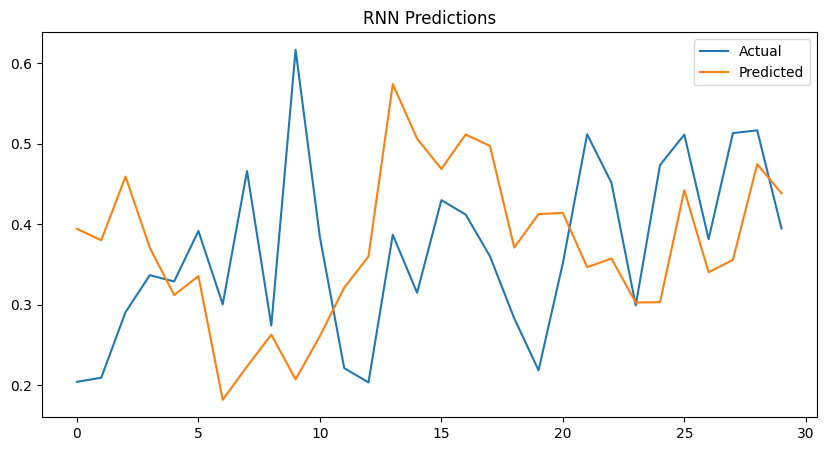

1/1 [==============================] - 0s 23ms/step


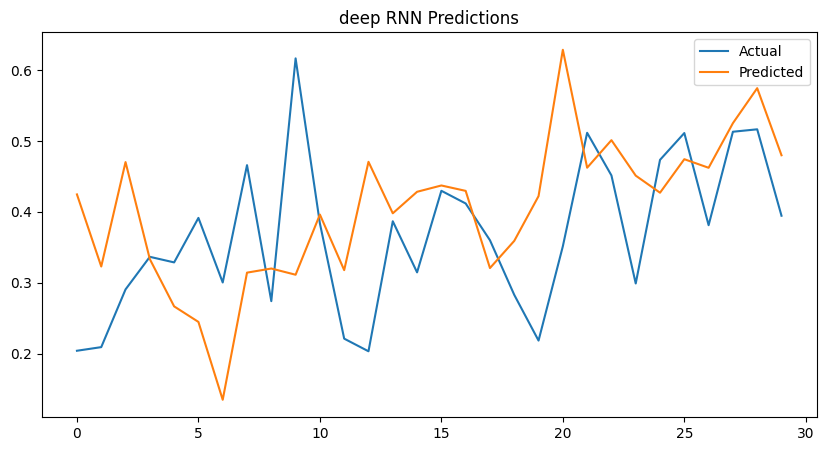

1/1 [==============================] - 0s 24ms/step


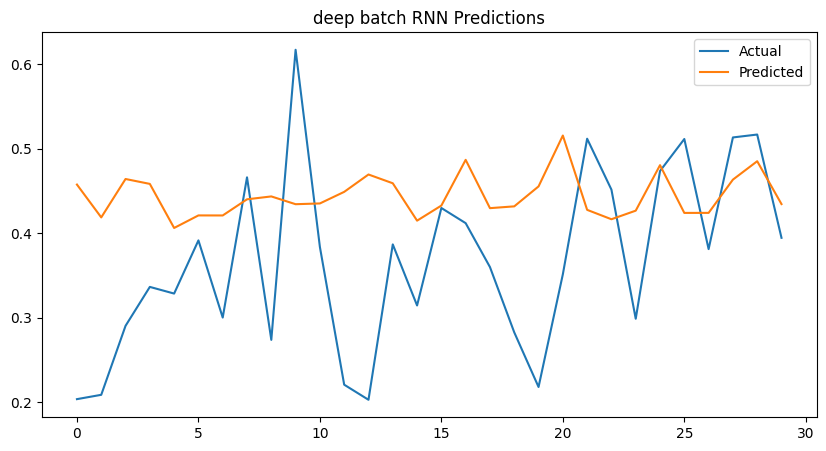

1/1 [==============================] - 0s 30ms/step


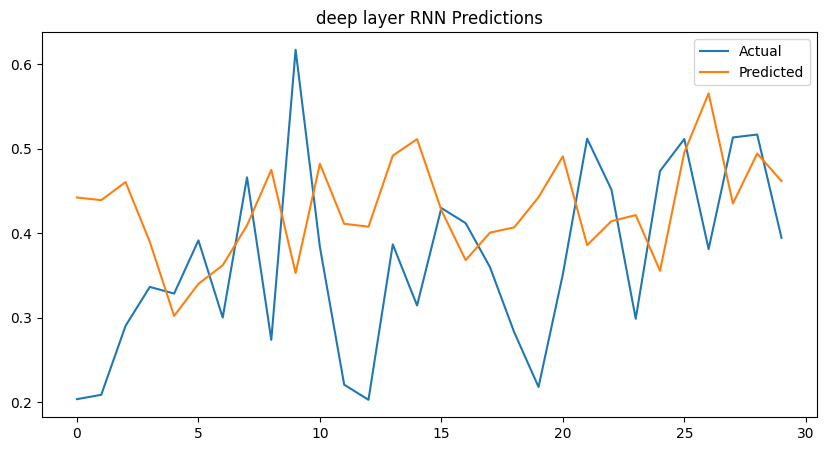

1/1 [==============================] - 0s 26ms/step


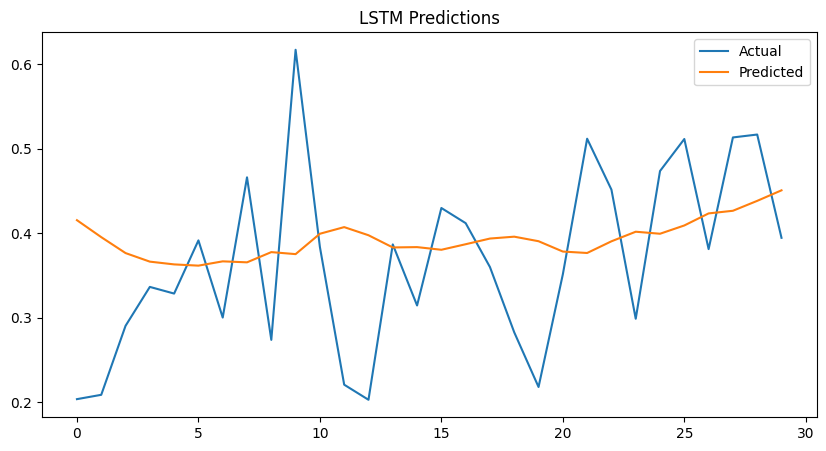

1/1 [==============================] - 0s 23ms/step


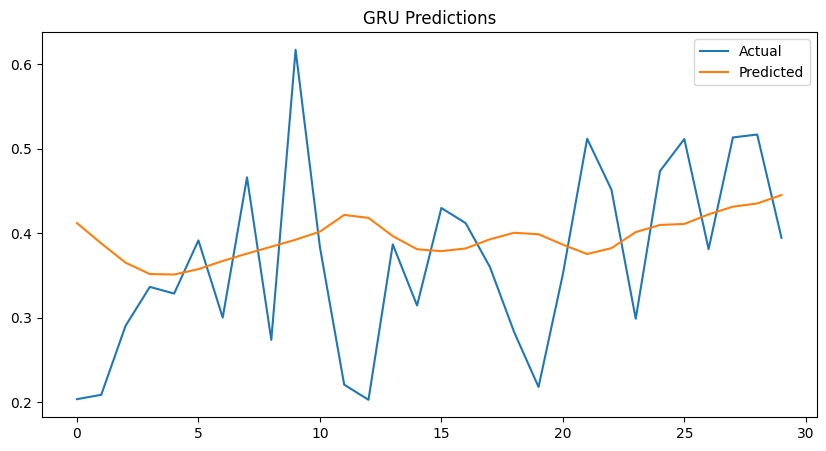

In [46]:
y_pred_rnn = rnn_model.predict(X_test)
plot_predictions(y_test, y_pred_rnn, title="RNN Predictions")

y_pred_deep_rnn_without = deep_rnn_model_without.predict(X_test)
plot_predictions(y_test, y_pred_deep_rnn_without, title="deep RNN Predictions")


y_pred_deep_rnn = deep_rnn_model.predict(X_test)
plot_predictions(y_test, y_pred_deep_rnn, title="deep batch RNN Predictions")

y_pred_deep_layer_rnn = deep_rnn_model_layer.predict(X_test)
plot_predictions(y_test, y_pred_deep_layer_rnn, title="deep layer RNN Predictions")

y_pred_lstm = lstm_model.predict(X_test)
plot_predictions(y_test, y_pred_lstm, title="LSTM Predictions")

y_pred_gru = gru_model.predict(X_test)
plot_predictions(y_test, y_pred_gru, title="GRU Predictions")